In [3]:
import numpy as np
from src.xpr_feature_reshaping import norm
from src.xpr_plot import show_hist
from src.xpr_plot import show_feature_label
from src.xpr_plot import *

# Load the datasets
path_app = "src"
dataset0 = np.loadtxt("./%s/data_historical/Code_Red_I.csv" % path_app, delimiter=",")
dataset1 = np.loadtxt("./%s/data_historical/Nimda.csv" % path_app, delimiter=",")
dataset2 = np.loadtxt("./%s/data_historical/Slammer.csv" % path_app, delimiter=",")
dataset3 = np.loadtxt("./%s/data_historical/Moscow_blackout.csv" % path_app, delimiter=",")
dataset4 = np.loadtxt("./%s/data_historical/WannaCrypt.csv" % path_app, delimiter=",")
dataset5 = np.loadtxt("./%s/data_historical/RIPE_regular.csv" % path_app, delimiter=",")
dataset6 = np.loadtxt("./%s/data_historical/BCNET_regular.csv" % path_app, delimiter=",")
datasets = {"Code_Red_I": dataset0, "Nimda": dataset1, "Slammer": dataset2, "Moscow_blackout": dataset3, "WannaCrypt": dataset4, "RIPE_regular": dataset5, "BCNET_regular": dataset6}

def preprocess( dataset, div = 1 ):
    row_index_end = dataset.shape[0] - dataset.shape[0] % div  # divisible by div, but What is div for?
    data_x = dataset[:row_index_end, 4:-1]

    data_y = dataset[:row_index_end, -1]
    # Change training labels
    inds1 = np.where(data_y == -1)
    data_y[inds1] = 2
    return data_x,data_y

def getFeatures( dataset ):
    X, y = preprocess(dataset)
    return X, y 

def getProcessedFeatures( X, y, scalerType = "Std" ):
    Xp, yp = norm(X, y, scalerType)
    return Xp, yp

def showFeatureHist( X ):
    for i in range( X.shape[1]  ):
        show_hist( X[:, i], "feature" + str(i))


def compareFeatureHist(X, Xp, i ):
    show_hist(X[:,i], "feature "+ str(i))
    show_hist(Xp[:,i], "Processed feature "+ str(i))

def compareFeatureBaseScalers(X):
    columns = [0, 4, 13]
    Xstd, y1= norm(X, None, "Std")
    Xpower, y2 = norm(X, None, "Power")
    Xrobust, y3 = norm(X, None, "Robust")

    for i in columns:
        fig, (sub1, sub2, sub3, sub4) = plt.subplots(1,4, figsize=(15,5))
        fig.suptitle(feature_name(i) + "_" +str(i))
        show_hist(X[:,i], "Original ", sub1, fig )
        show_hist(Xstd[:,i], "Std ",  sub2, fig )
        show_hist(Xpower[:,i], "Power " ,  sub3, fig)
        show_hist(Xrobust[:,i], "Robust ",  sub4, fig)


# 1. Compare different feature scaler methods

From the histogram of the features, we could see that there are three types of features distribution:
[0-3, 7-9, 11, 33-36]: there features are skewed with High frequency when near zero, and low frequency when big number. The PowerScaler would be a good choice.
[4-6, 10,12] there features are like normal distribution. The StandardScaler would be a good choice.
[13-32]: there features are only 1s and 0s, there is no need to scale them.

The Code below compares 3 different features from each type [0, 4, 13] and how the different scalers effect them.

Conclusion: We could see from the diagrams, that the PowerScaler works far more better than the other methods when dealing with skewed features. On the other hand, for the norm distribution and 1-0 distribution， the diffee scalers have no significant effect.

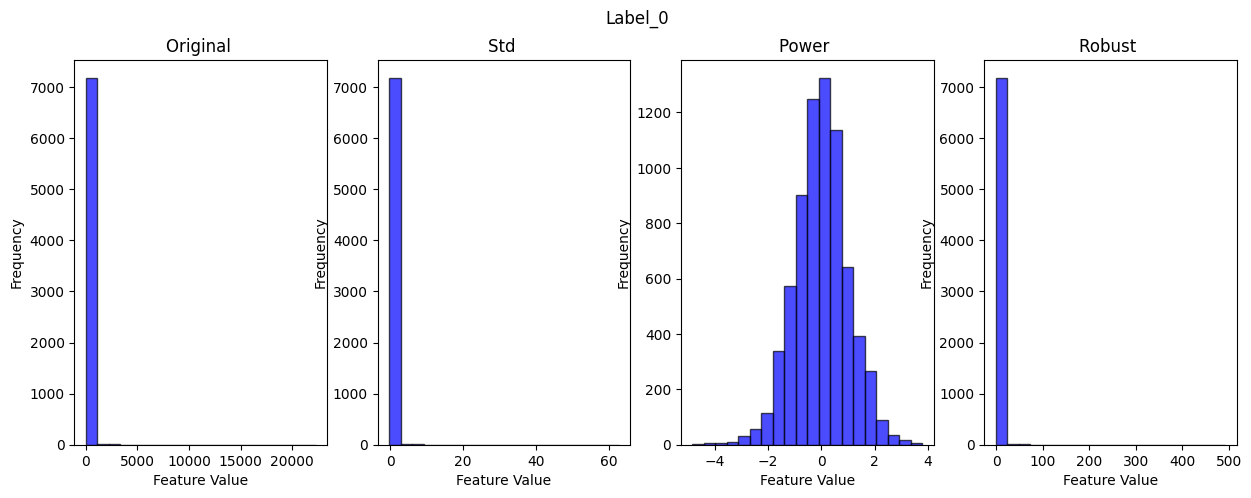

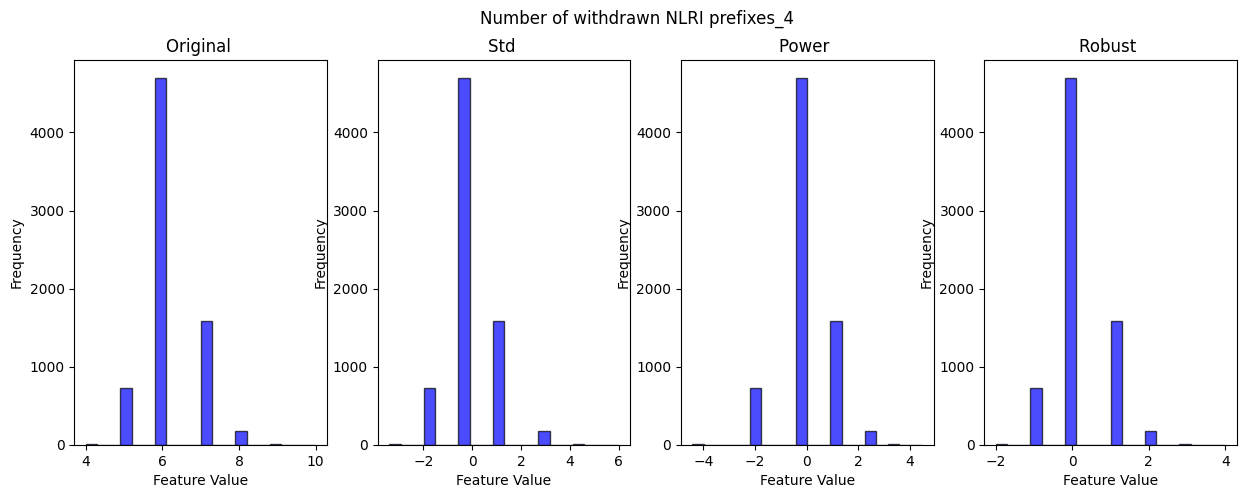

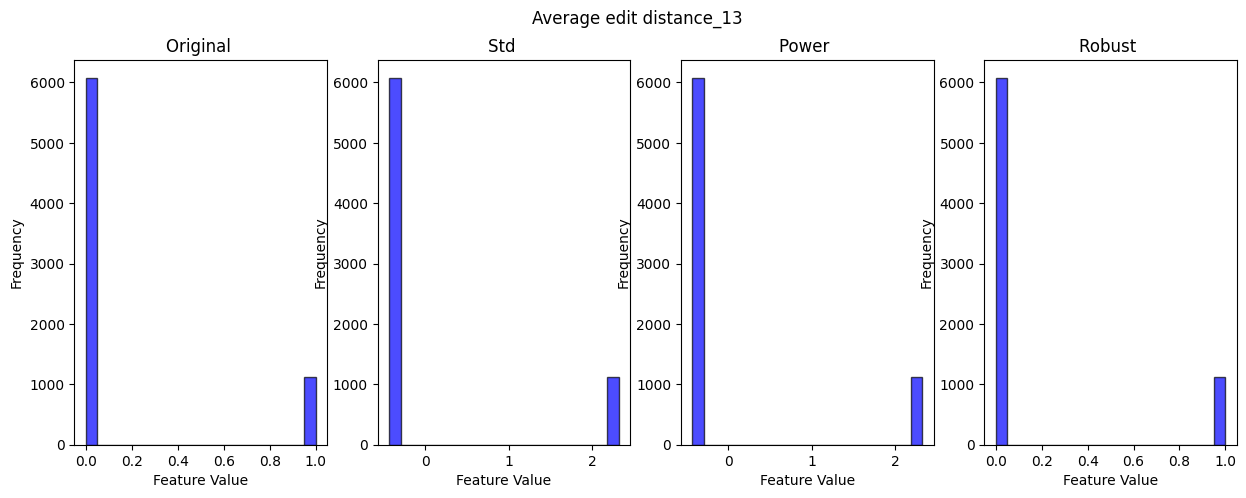

In [4]:
import matplotlib.pyplot as plt


X,y = getFeatures( datasets["Code_Red_I"])
Xp, yp = norm( X, None , "Power")

compareFeatureBaseScalers(X)